In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
train=pd.read_csv('bigmartTrainset.csv')
test=pd.read_csv('bigmartTest.csv')

In [5]:
#combining both train and test data sets into one to perform feature engineering and then divide them later again. 
#This saves the trouble of performing the same steps twice on test and train. 


In [6]:
#Creating a new column['source] which will specify which observation belongs to test and which observation belongs to train.
#this will also help us separating both the datasets later after we perform feature engineering just by one line code.
train['source']='train'
test['source']='test'

In [7]:
df= pd.concat([train, test])#axis=0(default)rowwise
print (train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [8]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [82]:
#Item_Outlet_Sales is the target variable and all values are missing as they are from test set. 
#we’ll impute all the missing values(if present) except the Item_Outlet_Sales column.
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
5679,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
5680,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [83]:
df.shape

(14204, 13)

In [84]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

# Feature engineering

In [85]:
df.describe()
#we can see for item_visibility the minimum value is 0.which is practically not possible.
#lets consider the value 0 as an missing value and impute it with the mean of the column.

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [86]:
df['Item_Visibility']=df['Item_Visibility'].replace([0],[df['Item_Visibility'].mean()])
df[df['Item_Visibility']==0]


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source


# imputing missing values

In [88]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [89]:
#Imputing missing values except the target column(Item_Outlet_Sales)

df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [90]:
#we dont have to worry about the missing values in Item_Outlet_Sales
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

# 1->Item_Identifier

In [91]:
categorical_features=[features for features in df.columns if df[features].dtypes=='object']
for features in categorical_features:
    print(features,len(df[features].unique()))

Item_Fat_Content 5
Item_Identifier 1559
Item_Type 16
Outlet_Identifier 10
Outlet_Location_Type 3
Outlet_Size 3
Outlet_Type 4
source 2


In [92]:
for features in categorical_features:
    print(features,df[features].value_counts())

Item_Fat_Content Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Item_Identifier NCT30    10
DRA24    10
FDS32    10
FDH08    10
FDT34    10
         ..
NCW54     7
FDL50     7
FDM10     7
FDX49     7
FDS22     7
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Type Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Outlet_Identifier OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010    

In [93]:
df['Item_Identifier'].value_counts()

NCT30    10
DRA24    10
FDS32    10
FDH08    10
FDT34    10
         ..
NCW54     7
FDL50     7
FDM10     7
FDX49     7
FDS22     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [94]:
#creating a new column and segregating the items
df['Item_Identifier_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Identifier_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_Combined, dtype: int64

In [95]:
df['Item_Identifier_Combined'] = df['Item_Identifier_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})
df['Item_Identifier_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Identifier_Combined, dtype: int64

In [96]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


# 2->Item_Fat_Content

In [97]:
df['Item_Fat_Content'].value_counts()
#we can see some mistyped things.lets put them together.

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [98]:

df['Item_Fat_Content_Combined'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'low fat':'Low Fat',
                                                             'reg':'Regular'})
df['Item_Fat_Content_Combined'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content_Combined, dtype: int64

In [99]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,Regular
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food,Regular
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,Low Fat


In [100]:
#Marking non-consumables as separate category :
df.loc[df['Item_Identifier_Combined']=="Non-Consumable",'Item_Fat_Content_Combined'] = "Non-Edible"
df['Item_Fat_Content_Combined'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content_Combined, dtype: int64

In [101]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,Regular
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food,Regular
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,Non-Edible


# 3->Outlet_Establishment_Year

In [102]:
#data collection and analysis done in 2013
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,Regular,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food,Regular,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,Non-Edible,26


In [103]:
#dropping columns from which we have created new columns &
#dropping columns irrelevant for model building
df=df.drop(['Item_Fat_Content','Item_Identifier','Outlet_Identifier'],axis=1)
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,249.8092,3735.1380,Dairy,0.016047,9.30,1999,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
1,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,Tier 3,Medium,Supermarket Type2,train,Drinks,Regular,4
2,141.6180,2097.2700,Meat,0.016760,17.50,1999,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
3,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,Tier 3,Medium,Grocery Store,train,Food,Regular,15
4,53.8614,994.7052,Household,0.065953,8.93,1987,Tier 3,High,Supermarket Type1,train,Non-Consumable,Non-Edible,26


# EDA

# Univariate Analysis

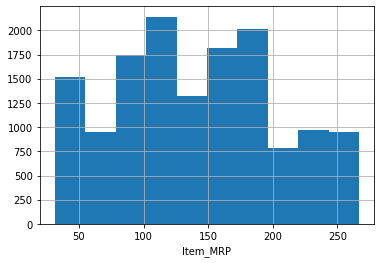

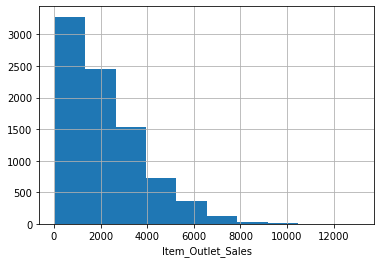

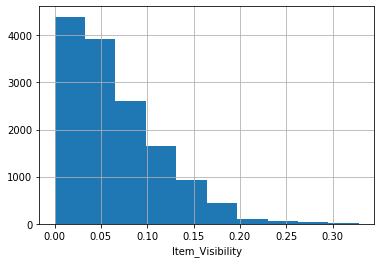

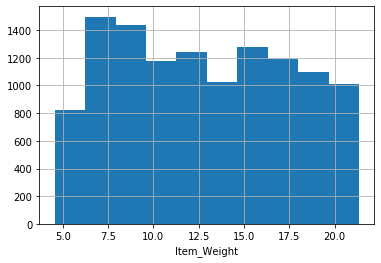

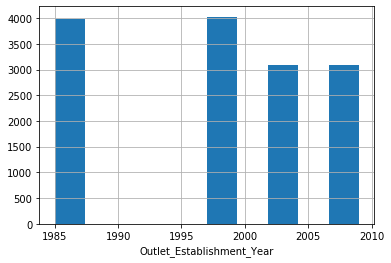

In [13]:
#checking skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist()
    plt.xlabel(feature)
    plt.show()

In [ ]:
#We can see few data are right skewed,which are to be treated

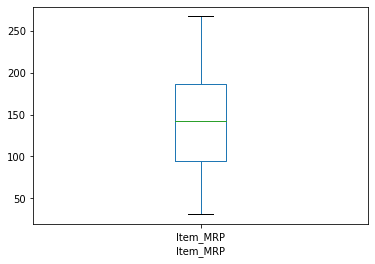

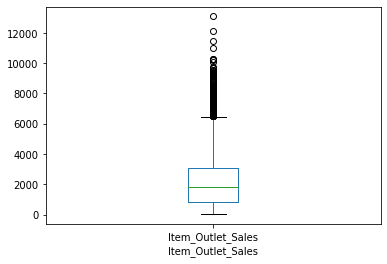

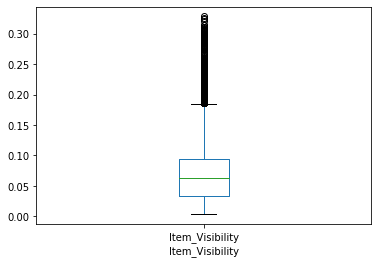

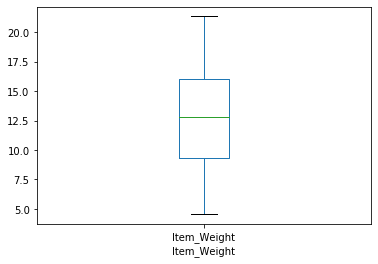

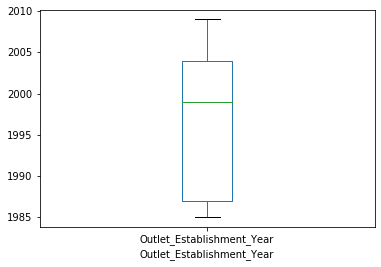

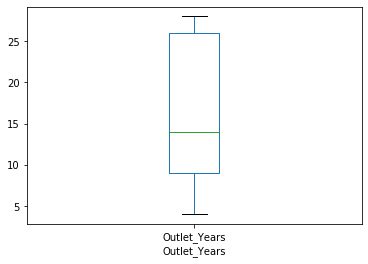

In [105]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

In [106]:
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,249.8092,3735.1380,Dairy,0.016047,9.30,1999,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
1,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,Tier 3,Medium,Supermarket Type2,train,Drinks,Regular,4
2,141.6180,2097.2700,Meat,0.016760,17.50,1999,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
3,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,Tier 3,Medium,Grocery Store,train,Food,Regular,15
4,53.8614,994.7052,Household,0.065953,8.93,1987,Tier 3,High,Supermarket Type1,train,Non-Consumable,Non-Edible,26


In [107]:
df.tail()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
5676,141.3154,NaN,Snack Foods,0.013496,10.5,1997,Tier 1,Small,Supermarket Type1,test,Food,Regular,16
5677,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,Tier 3,Medium,Supermarket Type2,test,Food,Regular,4
5678,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,Tier 2,Medium,Supermarket Type1,test,Non-Consumable,Non-Edible,11
5679,214.6218,NaN,Canned,0.065953,15.3,2007,Tier 2,Medium,Supermarket Type1,test,Food,Regular,6
5680,79.7960,NaN,Canned,0.104720,9.5,2002,Tier 2,Medium,Supermarket Type1,test,Food,Regular,11


# Bivariate Analysis

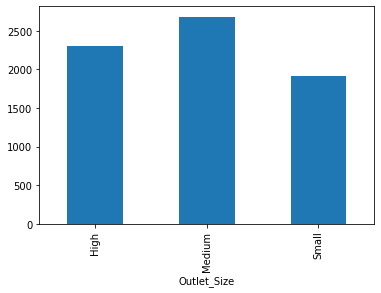

In [9]:
df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()

In [ ]:
#From above graph we can see Medium type outlet size has maximum sales instead of high outle size type

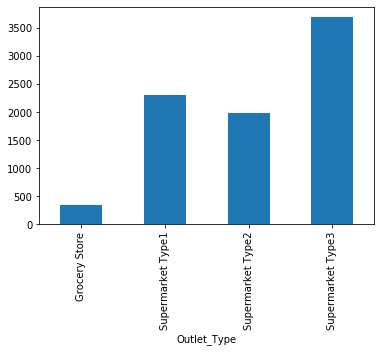

In [10]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()

In [ ]:
#supermarket type3 has the highest sales

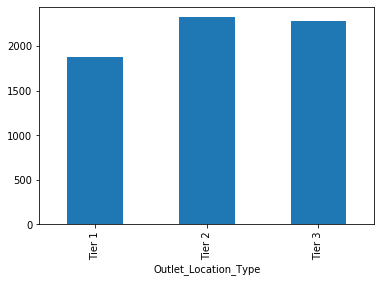

In [11]:
df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()

In [ ]:
#Tier1 city does not have higher sale

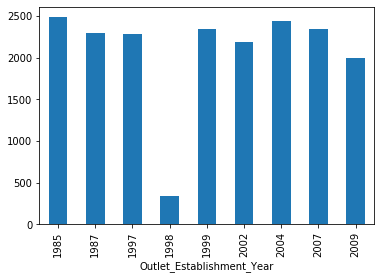

In [14]:
df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean().plot.bar()

In [ ]:
#we can see the sales varies tearly but in the year 1998 it has dropped drastically 

# Feature Engineering part-2

In [108]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [109]:
df.skew()

Item_MRP                     0.130728
Item_Outlet_Sales            1.177531
Item_Visibility              1.320683
Item_Weight                  0.111314
Outlet_Establishment_Year   -0.396465
Outlet_Years                 0.396465
dtype: float64

In [110]:
for col in numerical_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [111]:
df.skew()

Item_MRP                     0.130728
Item_Outlet_Sales           -0.882266
Item_Visibility              1.159801
Item_Weight                  0.111314
Outlet_Establishment_Year   -0.396465
Outlet_Years                 0.396465
dtype: float64

In [112]:
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,249.8092,8.225808,Dairy,0.015920,9.30,1999,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
1,48.2692,6.096776,Soft Drinks,0.019095,5.92,2009,Tier 3,Medium,Supermarket Type2,train,Drinks,Regular,4
2,141.6180,7.648868,Meat,0.016621,17.50,1999,Tier 1,Medium,Supermarket Type1,train,Food,Low Fat,14
3,182.0950,6.597664,Fruits and Vegetables,0.063869,19.20,1998,Tier 3,Medium,Grocery Store,train,Food,Regular,15
4,53.8614,6.903451,Household,0.063869,8.93,1987,Tier 3,High,Supermarket Type1,train,Non-Consumable,Non-Edible,26


In [113]:
df.tail()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
5676,141.3154,NaN,Snack Foods,0.013406,10.5,1997,Tier 1,Small,Supermarket Type1,test,Food,Regular,16
5677,169.1448,NaN,Starchy Foods,0.133648,7.6,2009,Tier 3,Medium,Supermarket Type2,test,Food,Regular,4
5678,118.7440,NaN,Health and Hygiene,0.070951,10.0,2002,Tier 2,Medium,Supermarket Type1,test,Non-Consumable,Non-Edible,11
5679,214.6218,NaN,Canned,0.063869,15.3,2007,Tier 2,Medium,Supermarket Type1,test,Food,Regular,6
5680,79.7960,NaN,Canned,0.099592,9.5,2002,Tier 2,Medium,Supermarket Type1,test,Food,Regular,11


# coverting data to numerical form by enumerate function

In [115]:
categorical_features_new=[features for features in df.columns if df[features].dtypes=='object']
for feature in categorical_features_new:
    labels_sorted=df[feature].value_counts().sort_values().index
   
    labels_ordered={k:i for i,k in enumerate(labels_sorted,0)}
    
    df[feature]=df[feature].map(labels_ordered)

In [116]:
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,249.8092,8.225808,11,0.015920,9.30,1999,0,2,3,1,2,2,14
1,48.2692,6.096776,6,0.019095,5.92,2009,2,2,0,1,0,1,4
2,141.6180,7.648868,7,0.016621,17.50,1999,0,2,3,1,2,2,14
3,182.0950,6.597664,15,0.063869,19.20,1998,2,2,2,1,2,1,15
4,53.8614,6.903451,13,0.063869,8.93,1987,2,0,3,1,1,0,26


In [117]:
df.tail()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
5676,141.3154,NaN,14,0.013406,10.5,1997,0,1,3,0,2,1,16
5677,169.1448,NaN,2,0.133648,7.6,2009,2,2,0,0,2,1,4
5678,118.7440,NaN,8,0.070951,10.0,2002,1,2,3,0,1,0,11
5679,214.6218,NaN,9,0.063869,15.3,2007,1,2,3,0,2,1,6
5680,79.7960,NaN,9,0.099592,9.5,2002,1,2,3,0,2,1,11


# separating training and testing datasets

In [118]:

train = df.loc[df['source']==1]
test = df.loc[df['source']==0]

In [119]:
train.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,249.8092,8.225808,11,0.015920,9.30,1999,0,2,3,1,2,2,14
1,48.2692,6.096776,6,0.019095,5.92,2009,2,2,0,1,0,1,4
2,141.6180,7.648868,7,0.016621,17.50,1999,0,2,3,1,2,2,14
3,182.0950,6.597664,15,0.063869,19.20,1998,2,2,2,1,2,1,15
4,53.8614,6.903451,13,0.063869,8.93,1987,2,0,3,1,1,0,26


In [120]:
test.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,107.8622,NaN,14,0.007536,20.750000,1999,0,2,3,0,2,2,14
1,87.3198,NaN,11,0.037708,8.300000,2007,1,2,3,0,2,1,6
2,241.7538,NaN,3,0.094924,14.600000,1998,2,2,2,0,1,0,15
3,155.0340,NaN,14,0.015271,7.315000,2007,1,2,3,0,2,2,6
4,234.2300,NaN,11,0.112077,12.792854,1985,2,2,1,0,2,1,28


In [121]:
train=train.drop(['source'],axis=1)
test=test.drop(['source','Item_Outlet_Sales'],axis=1)

In [122]:
train.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,249.8092,8.225808,11,0.015920,9.30,1999,0,2,3,2,2,14
1,48.2692,6.096776,6,0.019095,5.92,2009,2,2,0,0,1,4
2,141.6180,7.648868,7,0.016621,17.50,1999,0,2,3,2,2,14
3,182.0950,6.597664,15,0.063869,19.20,1998,2,2,2,2,1,15
4,53.8614,6.903451,13,0.063869,8.93,1987,2,0,3,1,0,26


In [123]:
test.head()

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,107.8622,14,0.007536,20.750000,1999,0,2,3,2,2,14
1,87.3198,11,0.037708,8.300000,2007,1,2,3,2,1,6
2,241.7538,3,0.094924,14.600000,1998,2,2,2,1,0,15
3,155.0340,14,0.015271,7.315000,2007,1,2,3,2,2,6
4,234.2300,11,0.112077,12.792854,1985,2,2,1,2,1,28


In [124]:
train.shape,test.shape

((8523, 12), (5681, 11))

# Data Scaling 

In [126]:
#Applying Standard scalar to independent variable only of training dataset
train_features_toscale=[feature for feature in train.columns if feature not in ['Item_Outlet_Sales'] ]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_scaled=ss.fit_transform(train[train_features_toscale])
train_scaled=pd.DataFrame(data=train_scaled,columns=train[train_features_toscale].columns)


In [127]:
train_scaled.head()

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,1.747454,0.116142,-1.147495,-0.839226,0.139541,-1.369334,0.728707,0.643927,0.577496,0.961385,-0.139541
1,-1.489023,-1.214698,-1.075958,-1.639047,1.334103,1.091569,0.728707,-2.225964,-2.501639,-0.359357,-1.334103
2,0.010040,-0.948530,-1.131694,1.101168,0.139541,-1.369334,0.728707,0.643927,0.577496,0.961385,-0.139541
3,0.660050,1.180814,-0.067083,1.503445,0.020085,1.091569,0.728707,-0.312704,0.577496,-0.359357,-0.020085
4,-1.399220,0.648478,-0.067083,-0.926780,-1.293934,1.091569,-2.192633,0.643927,-0.962071,-1.680100,1.293934


In [128]:
train=pd.concat([train['Item_Outlet_Sales'],train_scaled],axis=1)

In [129]:
train.head()

,Item_Outlet_Sales,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,8.225808,1.747454,0.116142,-1.147495,-0.839226,0.139541,-1.369334,0.728707,0.643927,0.577496,0.961385,-0.139541
1,6.096776,-1.489023,-1.214698,-1.075958,-1.639047,1.334103,1.091569,0.728707,-2.225964,-2.501639,-0.359357,-1.334103
2,7.648868,0.010040,-0.948530,-1.131694,1.101168,0.139541,-1.369334,0.728707,0.643927,0.577496,0.961385,-0.139541
3,6.597664,0.660050,1.180814,-0.067083,1.503445,0.020085,1.091569,0.728707,-0.312704,0.577496,-0.359357,-0.020085
4,6.903451,-1.399220,0.648478,-0.067083,-0.926780,-1.293934,1.091569,-2.192633,0.643927,-0.962071,-1.680100,1.293934


In [130]:
#Applying Standard scalar to test dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
test_scaled=ss.fit_transform(test)
test=pd.DataFrame(data=test_scaled,columns=test.columns)


In [131]:
test.head()

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Combined,Item_Fat_Content_Combined,Outlet_Years
0,-0.536555,0.928239,-1.339004,1.893454,0.139891,-1.369215,0.728725,0.644021,0.579114,0.970684,-0.139891
1,-0.868937,0.125805,-0.653482,-1.039426,1.095512,-0.138827,0.728725,0.644021,0.579114,-0.346358,-1.095512
2,1.629848,-2.014017,0.646519,0.444682,0.020438,1.091560,0.728725,-0.312748,-0.970555,-1.663401,-0.020438
3,0.226697,0.928239,-1.163261,-1.271465,1.095512,-0.138827,0.728725,0.644021,0.579114,0.970684,-1.095512
4,1.508110,0.125805,1.036266,0.018968,-1.532446,1.091560,0.728725,-1.269517,0.579114,-0.346358,1.532446


# Model Building

In [132]:
y=train['Item_Outlet_Sales']
x=train.drop(['Item_Outlet_Sales'],axis=1)

In [152]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

# 1-KNN

In [54]:
knr=KNeighborsRegressor()
maxr2_score(knr,x,y)

max_r2_score is at random_state   48   which is   0.6879049786555689


48

In [136]:
#cross validation for knn model
from sklearn.model_selection import cross_val_score
cvs_knr_mean=cross_val_score(knr,x,y,cv=10,scoring='r2').mean()
cvs_knr_std=cross_val_score(knr,x,y,cv=10,scoring='r2').std()
print(cvs_knr_mean)
cvs_knr_std

0.6881645371273102


0.02264212851683593

# 2-SVR

In [134]:
svr=SVR()
maxr2_score(svr,x,y)

max_r2_score is at random_state   69   which is   0.746026115767188


69

In [137]:
from sklearn.model_selection import cross_val_score
cvs_svr_mean=cross_val_score(svr,x,y,cv=10,scoring='r2').mean()
cvs_svr_std=cross_val_score(svr,x,y,cv=10,scoring='r2').std()
print(cvs_svr_mean)
cvs_svr_std

0.7205659381622243


0.025438325266788072

# 3-LinearRegression

In [138]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max_r2_score is at random_state   65   which is   0.3452157667063719


65

In [139]:
#no gridsearchcv.direct cross vallidation

In [140]:
#cross validation for Linear regression model
from sklearn.model_selection import cross_val_score
cvs_lr_mean=cross_val_score(lr,x,y,cv=10,scoring='r2').mean()
cvs_lr_std=cross_val_score(lr,x,y,cv=10,scoring='r2').std()
print(cvs_lr_mean)
cvs_lr_std

0.31274567593398517


0.029923339856000753

# 4-Linear Lasso regression

In [141]:
#lasso regression only works after giving parameters in instance
from sklearn.linear_model import Lasso
las=Lasso()
parameters={'alpha':[0.1,0.01,0.001,1]}
gscv=GridSearchCV(las,parameters,cv=10)
gscv.fit(x,y)
gscv.best_params_


{'alpha': 0.001}

In [142]:
las=Lasso(alpha=0.001)
maxr2_score(las,x,y)

max_r2_score is at random_state   65   which is   0.34524266512766233


65

In [143]:
#cross validation for Linear lasso model
from sklearn.model_selection import cross_val_score
cvs_las_mean=cross_val_score(las,x,y,cv=10,scoring='r2').mean()
cvs_las_std=cross_val_score(las,x,y,cv=10,scoring='r2').std()
print(cvs_las_mean)
cvs_las_std

0.312863438961433


0.029749871938742373

# 5-DecisionTreeRegressor

In [144]:
dtr=DecisionTreeRegressor()
maxr2_score(dtr,x,y)

max_r2_score is at random_state   48   which is   0.4861840446996244


48

In [145]:
from sklearn.model_selection import cross_val_score
cvs_dtr_mean=cross_val_score(dtr,x,y,cv=10,scoring='r2').mean()
cvs_dtr_std=cross_val_score(dtr,x,y,cv=10,scoring='r2').std()
print(cvs_dtr_mean)
cvs_dtr_std

0.4398762178403108


0.03782897289826421

# 6-Gradient boosting technique(GBM)

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
maxr2_score(gbr,x,y)

max_r2_score is at random_state   84   which is   0.7536009169285097


84

In [147]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor()
cvs_gbr_mean=cross_val_score(gbr,x,y,cv=10,scoring='r2').mean()
cvs_gbr_std=cross_val_score(gbr,x,y,cv=10,scoring='r2').std()
print(cvs_gbr_mean)
cvs_gbr_std

0.7339319089997274


0.02326842352295745

# 7-RandomForestRegressor

In [148]:
rfr=RandomForestRegressor()
maxr2_score(rfr,x,y)

max_r2_score is at random_state   48   which is   0.7020417737173117


48

In [149]:
from sklearn.model_selection import cross_val_score
rfr=RandomForestRegressor()
cvs_rfr_mean=cross_val_score(rfr,x,y,cv=10,scoring='r2').mean()
cvs_rfr_std=cross_val_score(rfr,x,y,cv=10,scoring='r2').std()
print(cvs_rfr_mean)
cvs_rfr_std

0.6726627406623147


0.028265708901973184

# 8-Adaboost

In [150]:
adar=AdaBoostRegressor()
maxr2_score(adar,x,y)

max_r2_score is at random_state   48   which is   0.6522639307470546


48

In [151]:
adar=AdaBoostRegressor()
cvs_adar_mean=cross_val_score(adar,x,y,cv=10,scoring='r2').mean()
cvs_adar_std=cross_val_score(adar,x,y,cv=10,scoring='r2').std()
print(cvs_adar_mean)
cvs_adar_std

0.6076543470243521


0.03153721803296903

# 9-XGBRegressor

In [153]:
xgbr=XGBRegressor()
maxr2_score(xgbr,x,y)

max_r2_score is at random_state   84   which is   0.724391047638253


84

In [154]:
xgbr=XGBRegressor()
cvs_xgbr_mean=cross_val_score(xgbr,x,y,cv=10,scoring='r2').mean()
cvs_xgbr_std=cross_val_score(xgbr,x,y,cv=10,scoring='r2').std()
print(cvs_xgbr_mean)
cvs_xgbr_std

0.7023114744251155


0.02889868386975353

# GridSearchCV for GradientBoostingRegressor

In [155]:
#From all the model tried above GradientBoostingRegressor performance is best 
#corresponding random_state=84
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,1],'n_estimators':[10,100,500,1000]}
gscv=GridSearchCV(gbr,parameters,cv=10,n_jobs=-1)
gscv.fit(x,y)
gscv.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

# Saving model

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
gbr=GradientBoostingRegressor(random_state=84,learning_rate=0.01,n_estimators=1000)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score=  ',r2_score(y_test,pred))

RMSE score=  0.5171635534185565
r2_score=   0.7539629999302118


In [162]:
from sklearn.externals import joblib
joblib.dump(gbr,'practiceproject_18.csv')

['practiceproject_18.csv']

In [163]:
model=joblib.load('practiceproject_18.csv')

In [164]:
#cancelling the log function by taking exponentials to get actual predictions
actual_predictions=np.exp(model.predict(test))
actual_predictions

array([1322.63753451, 1236.56398674,  477.0754673 , ..., 1725.30972695,
       3336.87728366, 1149.0266594 ])